# Bayesian Classifiers and LDA
**Criteria: Maximum Posteriori (MAP) and Linear Discriminant Analysis (LDA)**

                                                                                                        Alanna Paiva, 421942
                                                                                                        Ananda Nobre, 421784 

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import linalg
import scipy.stats as stats

## 1) Database:
#### 1.1) Medical diagnostic aid system (Dermatology)
- Diganostics of skin disease based on clinical information (collected by the
doctor in the office) and hispathological information (resulting from a biopsy
analysis of the tissue in a pathology laboratory).
- 6 Classes (pathologies): Psoriasis (1), Seborrheic Dermatitis (2), Lichen Planus (3),
Pityriasis rosea (4), Chronic dermatitis (5), Pityriasis rubrar pilar (6).
- 34 attributes.
- 358 samples: 111 (class 1) / 60 (class 2) / 71 (class 3) / 48 (class 4) / 48 (class 5) / 48 (class 6).
48 (class 4) / 48 (class 5) / 20 (class 6) 

In [2]:
df = pd.read_table('data_dermato.txt', delim_whitespace=True, header=None)
columns = ['eritema', 'escala', 'borda definidas', 'coceira', 'fenomeno koebner','papulas poligonais',
           'papulas foliculares', 'envolvimento mucosa','envolvimento joelho cotovelo','envolvimento escalpo',
           'historico familiar','incontinencia melanina','eosinofilos no infiltrado','infiltrado PNL', 'fibrose derme papilar', 
           'exocitose', 'acantose', 'hiperceratose', 'paraceratose', 'dilatacao em cava dos cones epiteliais', 
           'alongamento dos cones epiteliais da epiderme', 'estreitamento da epiderme auprapapilar', 'pustulas espongiformes', 
           'microabscesso de munro', 'hipergranulose focal', 'ausencia da camada granulosa', 
           'vacuolizacao e destruicao da camada basal', 'espongiose', 'aspecto dente de serra das cristas interpapilares', 
           'tampoes carneos foliculares', 'paraceratose perifolicular', 'infiltrado inflamatorio mononuclear', 
           'infiltracao em banda', 'idade', 'classe']
df.columns = columns
df.head()

,eritema,escala,borda definidas,coceira,fenomeno koebner,papulas poligonais,papulas foliculares,envolvimento mucosa,envolvimento joelho cotovelo,envolvimento escalpo,...,ausencia da camada granulosa,vacuolizacao e destruicao da camada basal,espongiose,aspecto dente de serra das cristas interpapilares,tampoes carneos foliculares,paraceratose perifolicular,infiltrado inflamatorio mononuclear,infiltracao em banda,idade,classe
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
2,3,3,2,1,1,0,0,0,2,2,...,0,0,0,0,0,0,1,0,20,1
3,2,3,3,0,0,0,0,0,1,1,...,0,0,0,0,0,0,2,0,10,1
4,3,3,3,0,0,0,0,0,3,3,...,3,0,0,0,0,0,2,0,38,1


In [3]:
# Removes the class column
feats = df.drop('classe', axis=1)

## 2) Initial data analysis
#### a) From the complete database (matrix X ∈ ℝ𝑁𝑥𝑝 containing all feature vectors), calculate:
- #### Mean vector (average of each feature).

In [4]:
mean_vec = df.drop('classe', axis=1).mean()

- ###### Variance vector (variance of each feature).

In [5]:
var_vec = df.drop('classe', axis=1).var()

- ###### Covariance matrix

In [6]:
def covariance_mat(df):
    # Calculates the means per column
    means = np.mean(df, axis=0)
    # Subtracts the mean from the respective column
    M = df - means
    # Calculate the covariance matrix
    covMat = M.T.dot(M) / (df.shape[0]-1)
    return covMat

cov_mat = covariance_mat(feats)

- ###### Correlation matrix

In [7]:
def correlation(df):
    # Calculates the means per column
    means = np.mean(df, axis=0)
    # Subtracts the mean from the respective column
    M = df - means
    # Calculate the covariance matrix
    covMat = M.T.dot(M) / (df.shape[0]-1)
    # Calculate the standard deviation of each column and multiply
    dps = df.std(axis=0)
    dps = np.outer(dps, dps.T)
    # Divide the covariance matrix by the standard deviations
    corrMat = covMat / dps
    return corrMat
 
corr_mat = correlation(feats)

#### b) From the results obtained in the previous item, answer:
- ###### What information, about the features, is obtained from the correlation matrix?

From the correlation matrix we get the correlation between two variables(features), this relationship can tell us if two variables have a linear correlation and how strong it is.

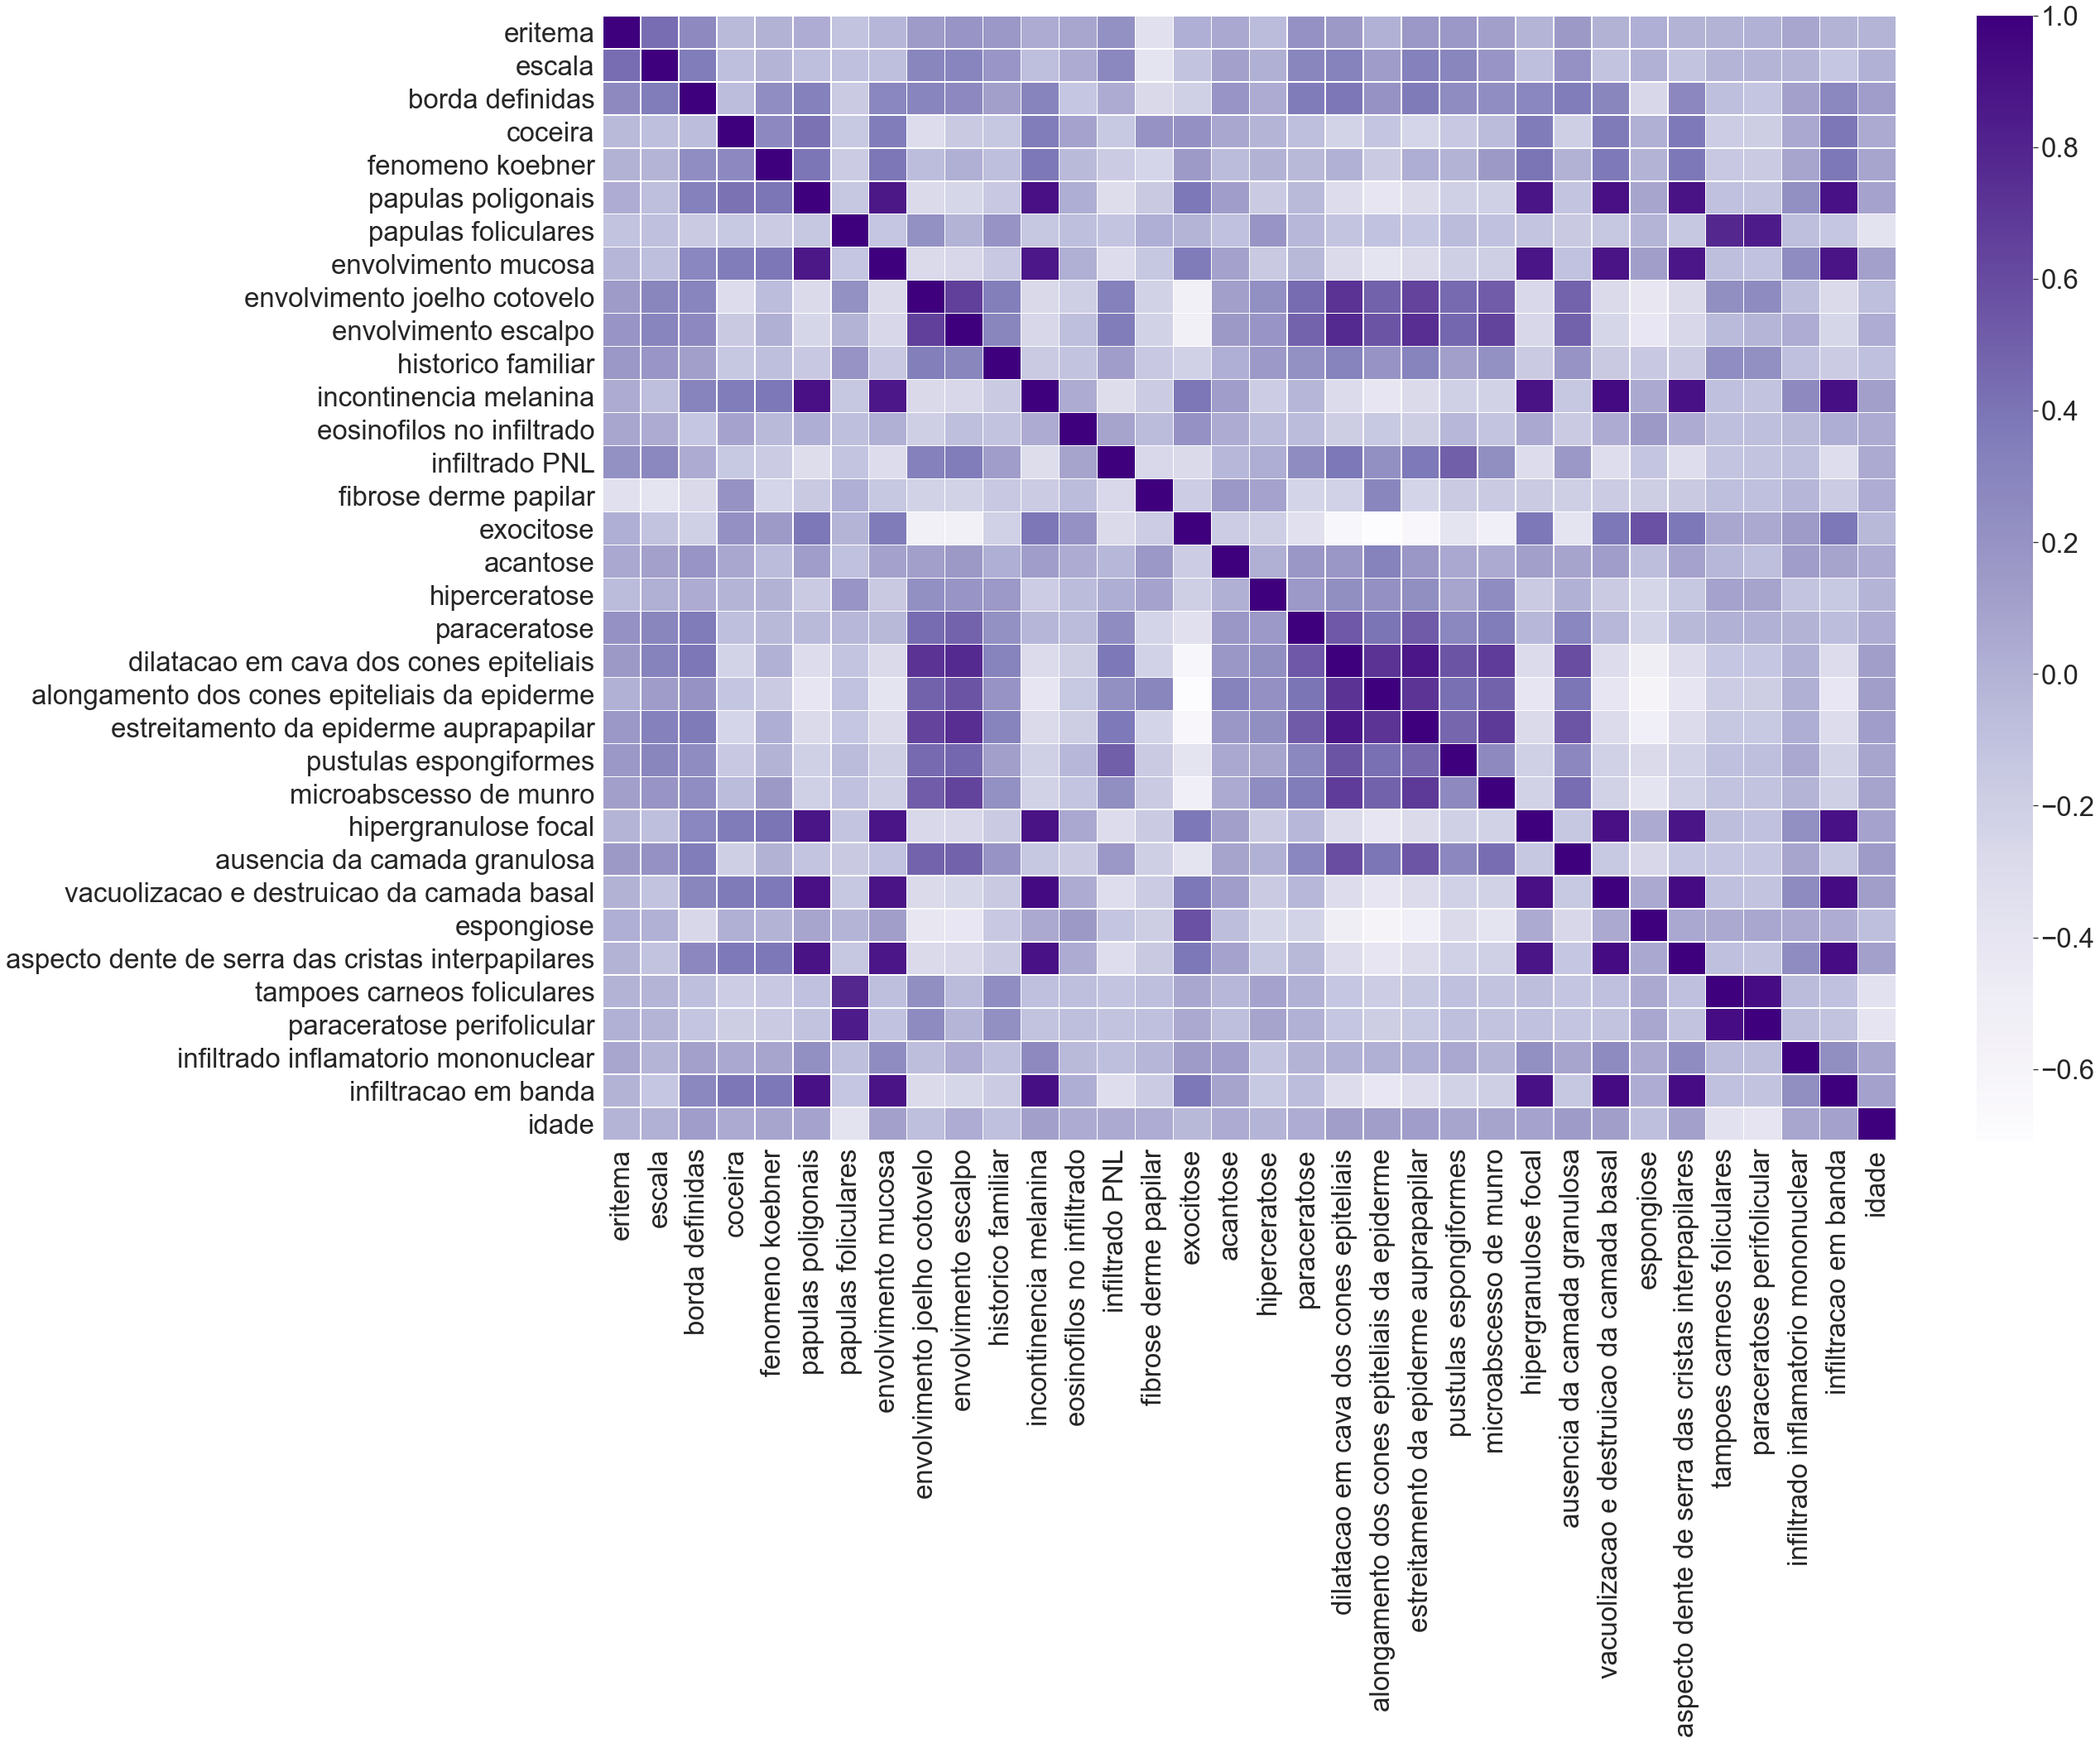

In [8]:
# Correlation heat-map
plt.figure(figsize=(35,25))                   
corrMatrix = correlation(feats)
sns.set(font_scale=3)
sns.heatmap(corrMatrix, cmap=plt.cm.Purples, linewidths=.5)
plt.show()

- ###### Which features are most correlated? 

In [9]:
# Selects the upper triangular matrix
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

# Finds features with correlation greater than 0.90
most_correlated = [column for column in upper.columns if any(upper[column] > 0.90)]
print('Most correlated features: \n')
[print(i) for i in most_correlated]

# Remove the features
df.drop(most_correlated, axis=1, inplace=True)

Most correlated features: 

incontinencia melanina
vacuolizacao e destruicao da camada basal
aspecto dente de serra das cristas interpapilares
paraceratose perifolicular
infiltracao em banda


## 2.1) Bayesian classifiers

##### Auxiliary Functions

In [10]:
# Function that calculates the accuracy 
def accuracy(original, predicted):
    correct = 0
    for i in range(len(original)):
        if original[i] == predicted[i]:
            correct += 1
    return correct / float(len(original)) * 100.0

# Z-Score standardization
def z_score(data):
    return (data - np.mean(data)) / np.std(data)

- ###### Implement the following Bayesian classifiers:
#### I) QDA (using the full formulation of the Bayesian discriminant).

In [11]:
class QDA:
    def __init__(self):
        self.n_classes = 0
        self.means = []
        self.class_prob = []
        self.class_mat = []
    
    def fit(self, X_train, y_train):
        self.n_classes = np.unique(y_train)
        # Separate the data by class
        for i, val in enumerate(self.n_classes):
            sep = [y_train == val]
            self.class_mat.append(X_train[tuple(sep)])
            self.means.append(np.mean(X_train[tuple(sep)], axis=0))
            self.class_prob.append(len(y_train[tuple(sep)]) / len(y_train))
            
    def predict(self, X_test):
        preds = []
        for x in X_test:
            probs = []
            for idx in range(len(self.n_classes)):
                # A priori probability of the classes
                priors = 2 *(np.log(self.class_prob[idx]))
                # Ln of the determinant of the covariance matrix
                log_det = np.log(np.linalg.det(self.covariance_mat(self.class_mat[idx])))
                # Distance
                dist = self.mahalanobis_distance(x, idx)
                # MAP criteria
                probs.append((log_det + dist - priors))
            preds.append(np.argmin(probs) + 1)
        return np.array(preds)

    def mahalanobis_distance(self, sample, i):
        # Calculates the covariance matrix of the class and its inverse
        cov_inv = linalg.inv(self.covariance_mat(self.class_mat[i]))
        # Calculates the distance between the sample and the mean vector of the class
        diff = (sample - self.means[i])
        # Calculates the multiplications between the vectors and the matrix
        dist = np.dot(diff.T, cov_inv )
        dist = np.dot(dist, diff)
        return np.sqrt(dist)
    
    def covariance_mat(self, df):
        # Calculate the means per culun
        means = np.mean(df, axis=0)
        # Subtracts the mean from the respective column
        M = df - means
        # Calculates the covariance matrix
        covMat = M.T.dot(M) / (df.shape[0]-1)
        # Avoid conditioning problem (Singular Matrix)
        covMat = covMat + np.eye(covMat.shape[1])*0.001
        return covMat 

#### II) Naive Bayes (considering that the problem's features are uncorrelated)

In [17]:
class NaiveBayes():
    def __init__(self):
        self.n_classes = 0
        self.means = []
        self.vars = []
        self.class_prob = []
        self.uncorrelated_mat_class = []
    
    def fit(self, X_train, y_train):
        self.n_classes = np.unique(y_train)
        # Serapara os dados por classe
        for i, val in enumerate(self.n_classes):
            sep = [y_train == val]
            self.means.append(np.mean(X_train[tuple(sep)], axis=0))
            self.vars.append(np.var(X_train[tuple(sep)], axis=0))
            self.class_prob.append(len(y_train[tuple(sep)]) / len(y_train))
        # Create the covariance matrix by class with the variances of the attributes on the diagonal and zeros in the remainder
        feat_len = len(X_train[0])
        for i in range(len( self.n_classes)):
            mat = np.zeros((feat_len, feat_len), float)
            np.fill_diagonal(mat, self.vars[i])
            self.uncorrelated_mat_class.append(mat)
        
    def predict(self, X_test):
        preds = []
        for x in X_test:
            probs = []
            for idx in range(len(self.n_classes)):
                # A priori probability of the classes
                priors = 2 *(np.log(self.class_prob[idx]))
                # Ln of the determinant of the covariance matrix
                det = np.log(np.linalg.det(self.covariance_mat(self.uncorrelated_mat_class[idx])))
                # Distance
                dist = self.mahalanobis_distance(x, idx)
                # MAP criteria
                probs.append((det + dist - priors))
            preds.append(np.argmin(probs) + 1)
        return np.array(preds)

    def covariance_mat(self, df):
        # Calculate the means per culun
        means = np.mean(df, axis=0)
        # Subtracts the mean from the respective column
        M = df - means
        # Calculates the covariance matrix
        covMat = M.T.dot(M) / (df.shape[0]-1)
        # Avoid conditioning problem (Singular Matrix)
        covMat = covMat + np.eye(covMat.shape[1])*0.001
        return covMat 
    
    def mahalanobis_distance(self, sample, i):
        # Calculates the covariance matrix of the class and its inverse
        cov_inv = linalg.inv(self.covariance_mat(self.uncorrelated_mat_class[i]))
        # Calculates the distance between the sample and the mean vector of the class
        diff = (sample - self.means[i])
        # Calculates the multiplications between the vectors and the matrix
        dist = np.dot(diff.T, cov_inv )
        dist = np.dot(dist, diff)
        return np.sqrt(dist) 

#### III) LDA (considerando que todos os classificadores possuem a mesma matriz de covariância e a mesma probabilidade à priori). 
- **OBS**: para calcular a matriz de covariância agregada, deve-se calcular as matrizes de covariância de cada classe, e calcular a média destas.

In [18]:
class LDA:
    def __init__(self):
        self.n_classes = 0
        self.means = []
        self.class_mat = []
    
    def fit(self, X_train, y_train):
        self.n_classes = np.unique(y_train)
        # Separate the data by class
        for i, val in enumerate(self.n_classes):
            sep = [y_train == val]
            self.class_mat.append(X_train[tuple(sep)])
            self.means.append(np.mean(X_train[tuple(sep)], axis=0))
            
        #Calculates the average covariance matrix of the classes
        self.mean_cov_mat = 0
        for i in range(len(self.class_mat)):
            self.mean_cov_mat += self.covariance_mat(self.class_mat[i])
        self.mean_cov_mat = self.mean_cov_mat/len(self.class_mat)
                
    def predict(self, X_test):
        preds = []
        for x in X_test:
            probs = []
            for idx in range(len(self.n_classes)):
                # Distance
                dist = self.mahalanobis_distance(x, idx)
                # MAP Criteria
                probs.append(dist)
            preds.append(np.argmin(probs) + 1)
        return np.array(preds)

    def covariance_mat(self, df):
        # Calculate the means per culun
        means = np.mean(df, axis=0)
        # Subtracts the mean from the respective column
        M = df - means
        # Calculates the covariance matrix
        covMat = M.T.dot(M) / (df.shape[0]-1)
        # Avoid conditioning problem (Singular Matrix)
        covMat = covMat + np.eye(covMat.shape[1])*0.001
        return covMat 
    
    def mahalanobis_distance(self, sample, i):
        # Calculates the covariance matrix of the class and its inverse
        cov_inv = linalg.inv(self.mean_cov_mat)
        # Calculate the distance between the sample and the mean vector of the class
        diff = (sample - self.means[i])
        # Calculates the multiplications between the vectors and the matrix
        dist = np.dot(diff.T, cov_inv )
        dist = np.dot(dist, diff)
        return np.sqrt(dist) 

#### For each classifier, using the database "dermatology" perform the following experiment:
   - Use k-fold cross validation (k = 5) to generate the results.
   - For each of the 5 partitioning of the data (between training and testing) perform the following procedure:
       - From the training data, calculate the mean and standard deviation for each feature and perform z-score normalization of the data (both training and test data).
       - Calculate the required statistics (covariance matrix, mean vector, a priori probability...), for the classifier, from the training data.
       - Classify the test data.

In [21]:
from sklearn.model_selection import KFold
X, y = np.array(df.drop('classe', axis=1)), np.array(df['classe'])

# Prepare K-fold
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Create models
qda = QDA()
lda = LDA()
nb = NaiveBayes()

# Divide os dados em 5 folds 
qdas, nbs, ldas = [], [], []
for tr_idx, ts_idx in cv.split(X):
    X_train, y_train = X[tr_idx], y[tr_idx]
    X_test, y_test = X[ts_idx], y[ts_idx]
    
    # Z-score normalization
    X_train = stats.zscore(X_train)
    X_test = stats.zscore(X_test)
    
    # Train the models
    qda.fit(X_train, y_train)
    nb.fit(X_train, y_train)
    lda.fit(X_train, y_train)
    
    # Make the predictions
    qda_pred = qda.predict(X_test)
    nb_pred = nb.predict(X_test)
    lda_pred = lda.predict(X_test)
    
    # Calculates the accuracy of each model
    qda_acc = accuracy(y_test, qda_pred)
    nb_acc = accuracy(y_test, nb_pred)
    lda_acc = accuracy(y_test, lda_pred)
    
    print(f'QDA Accuracy: %.2f%%' % qda_acc)
    print(f'NaiveBayes Accuracy: %.2f%%' % nb_acc)
    print(f'LDA Accuracy: %.2f%%' % lda_acc)
    
    # Armazena acurácias
    qdas.append(qda_acc)
    nbs.append(nb_acc)
    ldas.append(lda_acc)
    print('___________________________')

QDA Accuracy: 83.78%
NaiveBayes Accuracy: 94.59%
LDA Accuracy: 94.59%
___________________________
QDA Accuracy: 87.67%
NaiveBayes Accuracy: 100.00%
LDA Accuracy: 100.00%
___________________________
QDA Accuracy: 93.15%
NaiveBayes Accuracy: 95.89%
LDA Accuracy: 95.89%
___________________________
QDA Accuracy: 89.04%
NaiveBayes Accuracy: 95.89%
LDA Accuracy: 98.63%
___________________________
QDA Accuracy: 84.93%
NaiveBayes Accuracy: 98.63%
LDA Accuracy: 97.26%
___________________________


- Which classifier obtained the best average hit rate (accuracy)?

In [22]:
# Calculates average accuracy
qda_mean_acc = sum(qdas)/float(len(qdas))
nb_mean_acc = sum(nbs)/float(len(nbs))
lda_mean_acc = sum(ldas)/float(len(ldas))

print(f'QDA Mean Accuracy: %.2f%%' % qda_mean_acc)
print(f'Naive Bayes Mean Accuracy: %.2f%%' % nb_mean_acc)
print(f'LDA Mean Accuracy: %.2f%%' % lda_mean_acc)

QDA Mean Accuracy: 87.72%
Naive Bayes Mean Accuracy: 97.00%
LDA Mean Accuracy: 97.28%


### Can this problem be considered linearly separable? Justify

Linearly separable problems are pattern classification problems that can be solved with linear decision surface. The QDA, Naive Bayes and LDA classifiers use this concept to make their classifications, and as we can see, for this problem satisfactory accuracy was obtained with all three.

## 2.2) LDA (CDA) as a linear transformation.
#### a) Starting with the dermatology database, perform the following experiment:
   - Separate the data between training (70%) and testing (30%).

In [23]:
from sklearn.model_selection import train_test_split
X, y = np.array(df.drop('classe', axis=1)), np.array(df['classe'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

   - From the training data, calculate the mean and standard deviation for each feature and perform z-score normalization of the data (both training and test data).

In [24]:
# Normalized Features
#X_train = z_score(X_train)
#y_train = z_score(y_train)

**When the Z-score normalization of the data was made, the average accuracy dropped by 29%, so I chose not to do it.**

- From the training data, apply the LDA method using the multiple projections approach (also known as Canonical Discriminant Analysis, CDA).

In [25]:
class CDA:
    def __init__(self, n_feats):
        self.n_feats = n_feats
        self.n_classes = np.unique(y_train)
        self.data_mean = np.mean(X_train)
        self.means = []
        self.class_prob = []
        self.class_mat = []
        self.class_cov_mat = []
        self.Sw = np.zeros((len(X_train[1]), len(X_train[1])), float)
        self.Sb = 0
    
    def projection_vector(self, X_train, y_train):
        # Separate the data by class
        for i, val in enumerate(self.n_classes):
            sep = [y_train == val]
            self.class_mat.append(X_train[tuple(sep)])
            self.means.append(np.mean(X_train[tuple(sep)], axis=0))
            self.class_prob.append(len(y_train[tuple(sep)]) / len(y_train))
            self.class_cov_mat.append(self.covariance_mat(self.class_mat[i]))
            # Calculate Sw matrix
            self.Sw += np.dot(self.class_prob[i], self.class_cov_mat[i])
            # Calculate Sb matrix
            self.Sb += self.class_prob[i] + np.dot((
                self.means[i] - self.data_mean), (self.means[i] - self.data_mean).T)
        
        return self.get_matrix()
            
    def get_matrix(self):
        # Calculate the inverse matrix of Sw and multiply by the Sb matrix
        invSw_by_Sb = np.dot(linalg.inv(self.Sw), self.Sb)
        # Calculate the eigenvalues and eigenvectors
        a_values, a_vectors = np.linalg.eig(invSw_by_Sb)
        df_a_values = pd.DataFrame(a_values)
        df_a_vectors = pd.DataFrame(a_vectors)
        
        # Create the W matrix from the eigenvalues and eigenvectors
        W = pd.DataFrame({})
        for i in df_a_values.sort_values(by=0,ascending=True)[:self.n_feats].index.values:
            W = W.append(df_a_vectors.iloc[i],ignore_index=True)
        return W
    
    def covariance_mat(self, df):
        # Calculate the means per culun
        means = np.mean(df, axis=0)
        # Subtracts the mean from the respective column
        M = df - means
        # Calculates the covariance matrix
        covMat = M.T.dot(M) / (df.shape[0]-1)
        # Avoid conditioning problem (Singular Matrix)
        covMat = covMat + np.eye(covMat.shape[1])*0.001
        return covMat      

- From the calculated eigenvalues, define a quantity of characteristics needed to perform the projection of the data. (Obs: maximum quantity = "number of classes - 1")

In [26]:
n_feats = len(np.unique(y_train)) - 1

- Define the projection matrix W

In [27]:
cda = CDA(n_feats)
W = cda.projection_vector(X_train, y_train)

- Transform the training data from the W matrix.

In [28]:
Xtr = np.dot(X_train, W.T)

- Use the transformed data to train a Bayesian classifier (of your choice)

In [29]:
lda = LDA()
lda.fit(Xtr, y_train)

- Use the projection matrix to transform the test data.

In [30]:
Xts = np.dot(X_test, W.T)

- Classify the test data and get the hit rate of the classifier.

In [31]:
y_pred = lda.predict(Xts)
acc = accuracy(y_test, y_pred)
print(f'Accuracy: %.2f%%' % acc)

Accuracy: 83.64%
